In [1]:
#imports
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [2]:
df1Name = input("What is the name of your first dataset?: ")
df2Name = input("What is the name of your second dataset?: ")
df = pd.read_csv("/content/" + df1Name)
df2 = pd.read_csv("/content/" + df2Name)

headers = df.head(0)
print(headers)
df = df.dropna()
df = df.dropna(axis=1)
df= df.dropna(how='all')
numRows = df.shape[0]
df['Date'] = pd.to_datetime(df['Date'])

xDate = df['Date']
xOpen = df[['Open']]
xHigh = df[['High']]
xLow = df[['Low']]
xVol = df[['Volume']]
xClose = df[['Close']]

y = df[['Adj Close']]
y2 = df2[['Adj Close']]

What is the name of your first dataset?: sandp500.csv
What is the name of your second dataset?: dji.csv
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


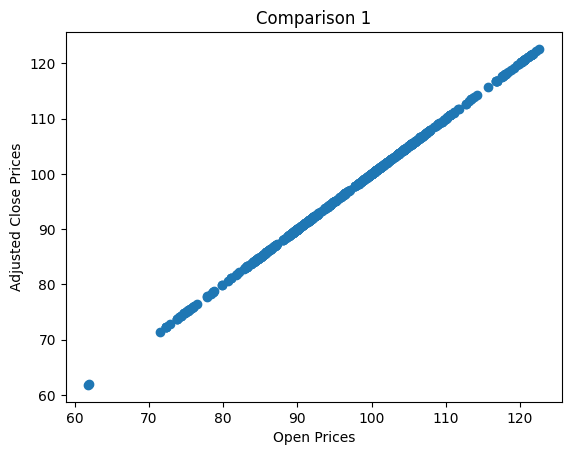

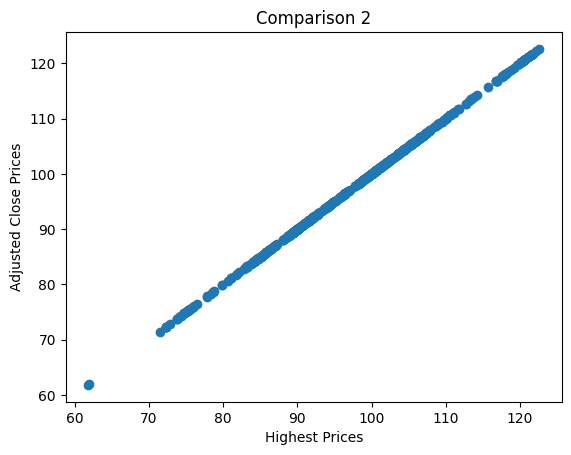

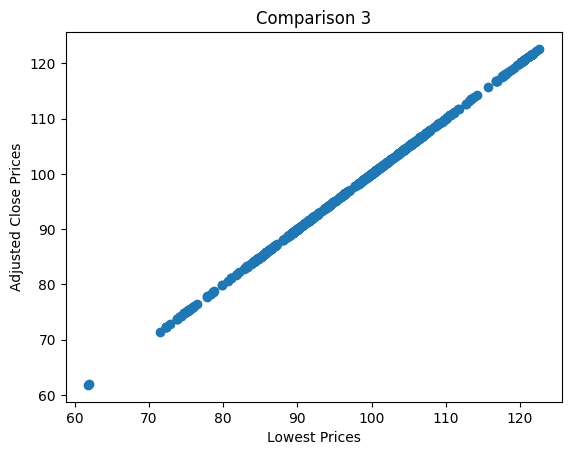

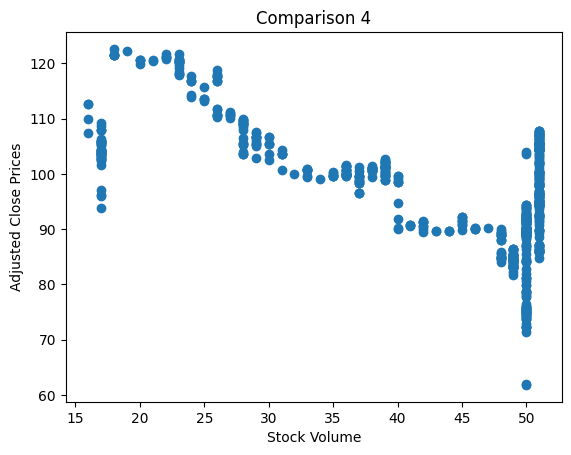

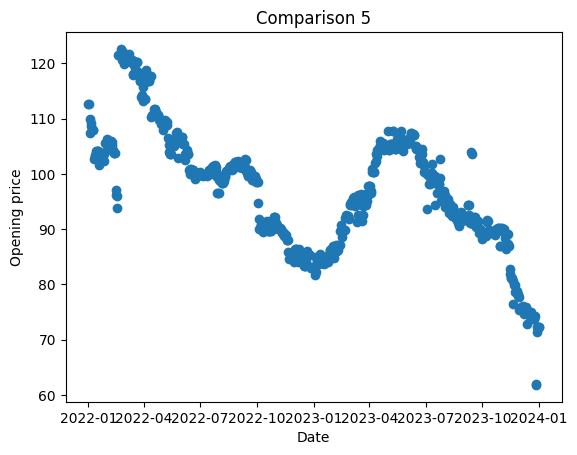

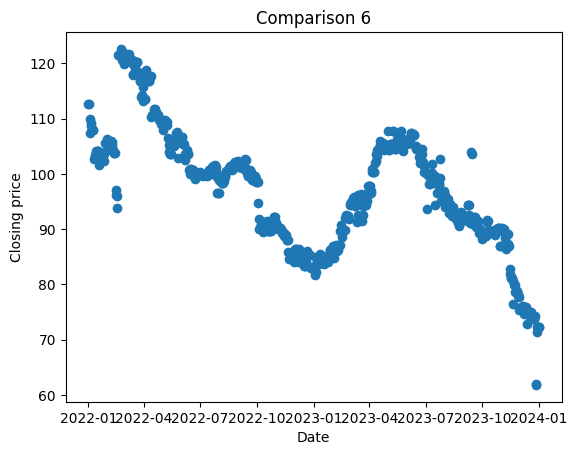

In [3]:
#Visualizing open prices to adjusted close price
plt.scatter(xOpen, y)
plt.xlabel('Open Prices')
plt.ylabel('Adjusted Close Prices')
plt.title('Comparison 1')
plt.show()

#Visualizing highest prices to adjusted close price
plt.scatter(xHigh, y)
plt.xlabel('Highest Prices')
plt.ylabel('Adjusted Close Prices')
plt.title('Comparison 2')
plt.show()

#Visualizing lowest prices to adjusted close price
plt.scatter(xLow, y)
plt.xlabel('Lowest Prices')
plt.ylabel('Adjusted Close Prices')
plt.title('Comparison 3')
plt.show()

#Visualizing stock volume to adjusted close price
plt.scatter(xVol, y)
plt.xlabel('Stock Volume')
plt.ylabel('Adjusted Close Prices')
plt.title('Comparison 4')
plt.show()

#Visualizing open price per day
plt.scatter(xDate, xOpen)
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.title('Comparison 5')
plt.show()

#Visualizing closing price per day
plt.scatter(xDate, xClose)
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Comparison 6')
plt.show()

After visualizing our data set, we can see that volume stock does not provide a meaningful prediction on our adjusted close prices.
Our models visualizes the stock prices from 2022-01-03 to 2023-12-29, for both data sets.


In [4]:
#Splitting for train test
X = df[['Open', 'High', 'Low']]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

1


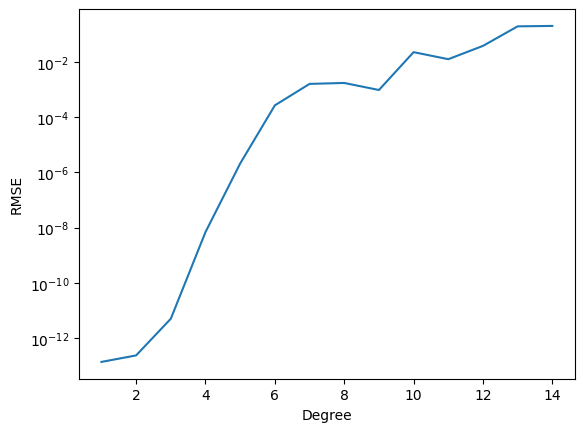

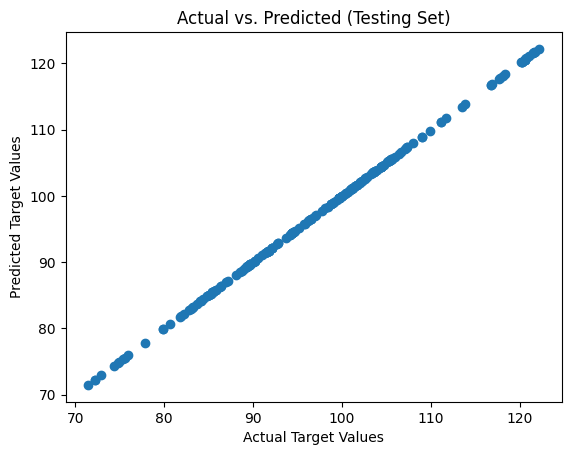

Train mean error:  7.14714219531686e-15
Test mean error:  7.686780505041084e-15
r^2 score train:  1.0
r^2 score test:  1.0


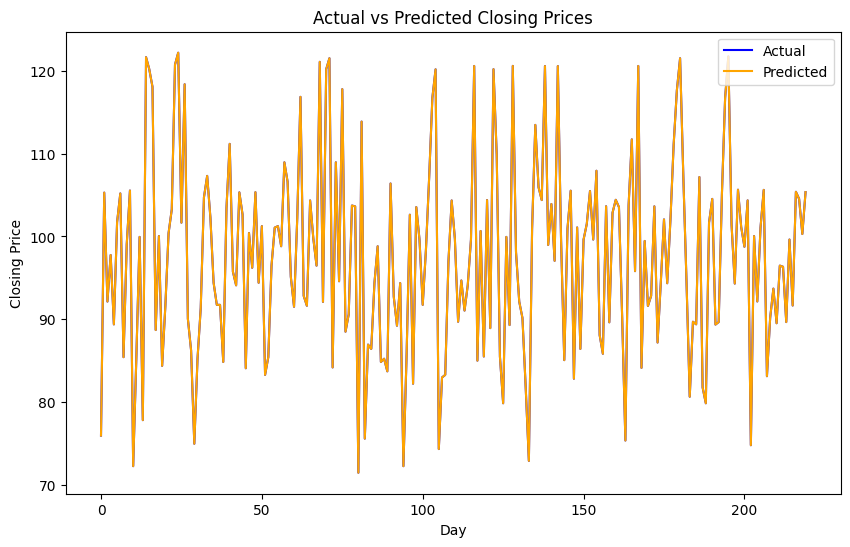

In [5]:
from sklearn.metrics import r2_score

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(xTrain)
x_test_scaler = scaler.transform(xTest)

lin = LinearRegression()

optimalDegree = 1
rmses = [];
degrees = np.arange(1, 15)
min_rmse = 9999999999

for degree in degrees:
  poly_features = PolynomialFeatures(degree=degree)
  xPolyTrain = poly_features.fit_transform(xTrain)

  poly_reg = LinearRegression()
  poly_reg.fit(xPolyTrain, yTrain)

  xPolyTest = poly_features.fit_transform(xTest)
  polyPredict = poly_reg.predict(xPolyTest)
  poly_mse = mean_squared_error(yTest, polyPredict)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_rmse)

  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    optimalDegree = degree

print(optimalDegree)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.show()

poly = PolynomialFeatures(degree=optimalDegree)
x_poly_train = poly.fit_transform(x_train_scaler)
x_poly_test = poly.transform(x_test_scaler)
poly.fit(x_poly_train, yTrain)
lin.fit(x_poly_train, yTrain)

yPredTrain = lin.predict(x_poly_train)
meanErrorTrain = mean_absolute_error(yTrain, yPredTrain)

yPredTest = lin.predict(x_poly_test)
meanErrorTest = mean_absolute_error(yTest, yPredTest)

plt.scatter(yTest, yPredTest)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs. Predicted (Testing Set)")
plt.show()

print("Train mean error: ", meanErrorTrain)
print("Test mean error: ", meanErrorTest)

r2_train = r2_score(yTrain, yPredTrain)
r2_test = r2_score(yTest, yPredTest)
print("r^2 score train: ", r2_train)
print("r^2 score test: ", r2_test)

results = pd.DataFrame({'Actual': yTest['Adj Close'].values, 'Predicted': yPredTest.flatten()})

# Plot actual vs predicted closing prices with different colors
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', color='orange')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

Mean Squared Error on Testing Set (data1): 3.918073559406282e-27
Mean Squared Error on Second Dataset (data2): 42440.27652500474


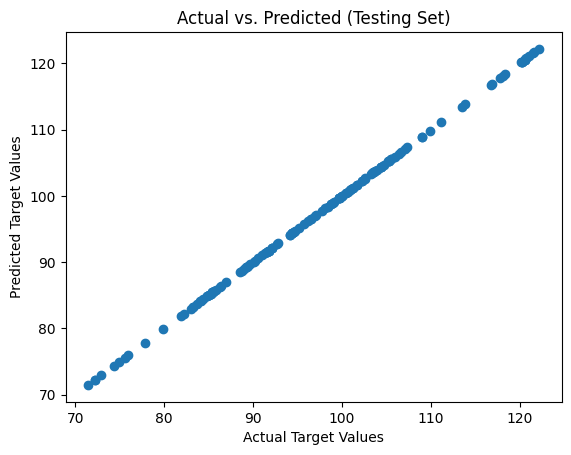

In [6]:
X2 = df2[['Open', 'High', 'Low']]

# Split the first dataset (data1) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features for training data
poly = PolynomialFeatures(degree=optimalDegree)
X_train_poly = poly.fit_transform(X_train)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate on testing set (first dataset)
y_pred_test = model.predict(poly.transform(X_test))
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error on Testing Set (data1): {mse_test}")

# Test on the second dataset
y_pred_new = model.predict(poly.transform(X2))
mse_new = mean_squared_error(y2, y_pred_new)
print(f"Mean Squared Error on Second Dataset (data2): {mse_new}")

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs. Predicted (Testing Set)")
plt.show()

1


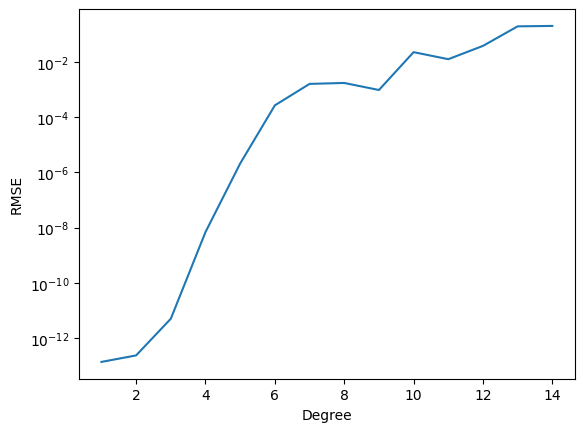

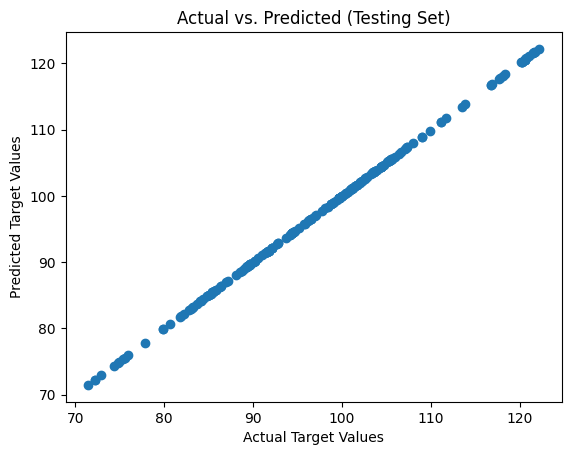

1.6936224112638006e-14
1.660086209912234e-14


In [7]:
#code to scale features to a similar range, so that we can improve performance
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
scaler = StandardScaler()

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

x_train_scaled = minmax_scaler.fit_transform(xTrain)
x_test_scaled = minmax_scaler.transform(xTest)

lin = LinearRegression()

optimalDegree = 1
rmses = [];
degrees = np.arange(1, 15)
min_rmse = 9999999999

for degree in degrees:
  poly_features = PolynomialFeatures(degree=degree)
  xPolyTrain = poly_features.fit_transform(xTrain)

  poly_reg = LinearRegression()
  poly_reg.fit(xPolyTrain, yTrain)

  xPolyTest = poly_features.fit_transform(xTest)
  polyPredict = poly_reg.predict(xPolyTest)
  poly_mse = mean_squared_error(yTest, polyPredict)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_rmse)

  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    optimalDegree = degree

print(optimalDegree)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.show()

poly = PolynomialFeatures(degree=optimalDegree)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)
poly.fit(x_poly_train, yTrain)
lin.fit(x_poly_train, yTrain)

yPredTrain = lin.predict(x_poly_train)
meanErrorTrain = mean_absolute_error(yTrain, yPredTrain)

yPredTest = lin.predict(x_poly_test)
meanErrorTest = mean_absolute_error(yTest, yPredTest)

plt.scatter(yTest, yPredTest)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs. Predicted (Testing Set)")
plt.show()

print(meanErrorTrain)
print(meanErrorTest)

